# Python packages for graph analysis
- igraph\-python : https://igraph.org/python/
- networkx : https://networkx.github.io/documentation/stable

In [ ]:
! pip install networkx

In [ ]:
import networkx as nx

import pandas as pd
from pandas import DataFrame, Series
import numpy as np

# Dataset : Data Science for COVID-19 in South Korea (DS4C)
- dataset : https://www.kaggle.com/kimjihoo/coronavirusdataset/data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# load dataset
df = pd.read_csv('/content/drive/MyDrive/dsail/skku/2021-1/[조교]datamining/week4_graph/archive/PatientInfo.csv', dtype={'patient_id': str, 'infected_by':str})

In [ ]:
print(df.shape)
df.head()

(5165, 14)


,patient_id,sex,age,country,province,city,infection_case,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
0,1000000001,male,50s,Korea,Seoul,Gangseo-gu,overseas inflow,NaN,75,2020-01-22,2020-01-23,2020-02-05,NaN,released
1,1000000002,male,30s,Korea,Seoul,Jungnang-gu,overseas inflow,NaN,31,NaN,2020-01-30,2020-03-02,NaN,released
2,1000000003,male,50s,Korea,Seoul,Jongno-gu,contact with patient,2002000001,17,NaN,2020-01-30,2020-02-19,NaN,released
3,1000000004,male,20s,Korea,Seoul,Mapo-gu,overseas inflow,NaN,9,2020-01-26,2020-01-30,2020-02-15,NaN,released
4,1000000005,female,20s,Korea,Seoul,Seongbuk-gu,contact with patient,1000000002,2,NaN,2020-01-31,2020-02-24,NaN,released


## Create a directed graph
- nodes : 환자 (patient)
- edges : 감염 방향 (`infected_by` -> `patient_id`)

In [ ]:
g = nx.DiGraph(df.loc[:, ('infected_by', 'patient_id')].dropna().values.tolist()) # [(vs_id, vs_id)]

In [ ]:
g.nodes

NodeView(('2002000001', '1000000003', '1000000002', '1000000005', '1000000006', '1000000007', '1000000010', '1000000017', '1000000013', '1000000014', '1000000016', '1000000021', '1000000019', '1000000015', '1000000020', '1000000022', '1000000025', '1000000028', '1000000029', '1000000031', '1000000033', '1000000034', '1000000037', '1500000002', '1000000040', '1000000045', '1000000041', '1000000046', '1000000054', '1000000053', '1000000060', '1000000059', '1000000061', '2017000005', '1000000062', '1000000047', '1000000064', '1000000068', '1000000065', '1000000067', '1000000078', '1000000111', '1000000113', '1000000115', '1000000114', '1000000117', '1000000118', '1000000119', '1000000120', '1000000121', '1000000126', '1000000108', '1000000127', '1000000128', '1000000129', '1000000100', '1000000130', '1000000134', '1000000140', '1000000164', '1000000124', '1000000174', '1000000178', '1000000188', '1000000189', '1000000116', '1000000191', '1000000221', '1000000211', '1000000224', '100000021

In [ ]:
g.edges

OutEdgeView([('2002000001', '1000000003'), ('1000000003', '1000000006'), ('1000000003', '1000000007'), ('1000000003', '1000000010'), ('1000000003', '1000000017'), ('1000000002', '1000000005'), ('1000000017', '1000000013'), ('1000000017', '1000000016'), ('1000000013', '1000000014'), ('1000000014', '2000000019'), ('1000000016', '1000000021'), ('1000000021', '1000000019'), ('1000000015', '1000000020'), ('1000000020', '1000000078'), ('1000000022', '1000000025'), ('1000000022', '1000000061'), ('1000000028', '1000000029'), ('1000000031', '1000000033'), ('1000000031', '1000000034'), ('1000000031', '1000000037'), ('1000000033', '1000000045'), ('1000000033', '1000000067'), ('1500000002', '1000000040'), ('1500000002', '1500000003'), ('1000000040', '1000000117'), ('1000000041', '1000000046'), ('1000000054', '1000000053'), ('1000000054', '1000000060'), ('1000000060', '1000000059'), ('2017000005', '1000000062'), ('1000000047', '1000000064'), ('1000000068', '1000000065'), ('1000000111', '1000000113'

In [ ]:
len(g.nodes)   

1717

In [ ]:
len(g.edges)

1346

- Accessing neighbors and edges

In [ ]:
g.degree()

DiDegreeView({'2002000001': 1, '1000000003': 5, '1000000002': 1, '1000000005': 1, '1000000006': 1, '1000000007': 1, '1000000010': 1, '1000000017': 3, '1000000013': 2, '1000000014': 2, '1000000016': 2, '1000000021': 2, '1000000019': 1, '1000000015': 1, '1000000020': 2, '1000000022': 2, '1000000025': 1, '1000000028': 1, '1000000029': 1, '1000000031': 3, '1000000033': 3, '1000000034': 1, '1000000037': 1, '1500000002': 2, '1000000040': 2, '1000000045': 1, '1000000041': 1, '1000000046': 1, '1000000054': 2, '1000000053': 1, '1000000060': 2, '1000000059': 1, '1000000061': 1, '2017000005': 1, '1000000062': 1, '1000000047': 1, '1000000064': 1, '1000000068': 1, '1000000065': 1, '1000000067': 1, '1000000078': 1, '1000000111': 2, '1000000113': 1, '1000000115': 1, '1000000114': 2, '1000000117': 1, '1000000118': 1, '1000000119': 1, '1000000120': 4, '1000000121': 1, '1000000126': 1, '1000000108': 1, '1000000127': 2, '1000000128': 1, '1000000129': 1, '1000000100': 2, '1000000130': 2, '1000000134': 1, 

In [ ]:
g.in_degree()

InDegreeView({'2002000001': 0, '1000000003': 1, '1000000002': 0, '1000000005': 1, '1000000006': 1, '1000000007': 1, '1000000010': 1, '1000000017': 1, '1000000013': 1, '1000000014': 1, '1000000016': 1, '1000000021': 1, '1000000019': 1, '1000000015': 0, '1000000020': 1, '1000000022': 0, '1000000025': 1, '1000000028': 0, '1000000029': 1, '1000000031': 0, '1000000033': 1, '1000000034': 1, '1000000037': 1, '1500000002': 0, '1000000040': 1, '1000000045': 1, '1000000041': 0, '1000000046': 1, '1000000054': 0, '1000000053': 1, '1000000060': 1, '1000000059': 1, '1000000061': 1, '2017000005': 0, '1000000062': 1, '1000000047': 0, '1000000064': 1, '1000000068': 0, '1000000065': 1, '1000000067': 1, '1000000078': 1, '1000000111': 0, '1000000113': 1, '1000000115': 0, '1000000114': 1, '1000000117': 1, '1000000118': 1, '1000000119': 1, '1000000120': 0, '1000000121': 1, '1000000126': 1, '1000000108': 0, '1000000127': 1, '1000000128': 1, '1000000129': 1, '1000000100': 0, '1000000130': 1, '1000000134': 1, 

In [ ]:
g.out_degree()

OutDegreeView({'2002000001': 1, '1000000003': 4, '1000000002': 1, '1000000005': 0, '1000000006': 0, '1000000007': 0, '1000000010': 0, '1000000017': 2, '1000000013': 1, '1000000014': 1, '1000000016': 1, '1000000021': 1, '1000000019': 0, '1000000015': 1, '1000000020': 1, '1000000022': 2, '1000000025': 0, '1000000028': 1, '1000000029': 0, '1000000031': 3, '1000000033': 2, '1000000034': 0, '1000000037': 0, '1500000002': 2, '1000000040': 1, '1000000045': 0, '1000000041': 1, '1000000046': 0, '1000000054': 2, '1000000053': 0, '1000000060': 1, '1000000059': 0, '1000000061': 0, '2017000005': 1, '1000000062': 0, '1000000047': 1, '1000000064': 0, '1000000068': 1, '1000000065': 0, '1000000067': 0, '1000000078': 0, '1000000111': 2, '1000000113': 0, '1000000115': 1, '1000000114': 1, '1000000117': 0, '1000000118': 0, '1000000119': 0, '1000000120': 4, '1000000121': 0, '1000000126': 0, '1000000108': 1, '1000000127': 1, '1000000128': 0, '1000000129': 0, '1000000100': 2, '1000000130': 1, '1000000134': 0,

In [ ]:
g.out_degree()['1000000003']

4

## Adding attributes to nodes, and edges

### Node attributes

In [ ]:
g.nodes['1000000003']['age'] = '50s'

In [ ]:
g.nodes.data()

NodeDataView({'2002000001': {}, '1000000003': {'age': '50s'}, '1000000002': {}, '1000000005': {}, '1000000006': {}, '1000000007': {}, '1000000010': {}, '1000000017': {}, '1000000013': {}, '1000000014': {}, '1000000016': {}, '1000000021': {}, '1000000019': {}, '1000000015': {}, '1000000020': {}, '1000000022': {}, '1000000025': {}, '1000000028': {}, '1000000029': {}, '1000000031': {}, '1000000033': {}, '1000000034': {}, '1000000037': {}, '1500000002': {}, '1000000040': {}, '1000000045': {}, '1000000041': {}, '1000000046': {}, '1000000054': {}, '1000000053': {}, '1000000060': {}, '1000000059': {}, '1000000061': {}, '2017000005': {}, '1000000062': {}, '1000000047': {}, '1000000064': {}, '1000000068': {}, '1000000065': {}, '1000000067': {}, '1000000078': {}, '1000000111': {}, '1000000113': {}, '1000000115': {}, '1000000114': {}, '1000000117': {}, '1000000118': {}, '1000000119': {}, '1000000120': {}, '1000000121': {}, '1000000126': {}, '1000000108': {}, '1000000127': {}, '1000000128': {}, '1

In [ ]:
nx.set_node_attributes(g, df.set_index('patient_id')['age'], 'age')

In [ ]:
g.nodes.data()

NodeDataView({'2002000001': {}, '1000000003': {'age': '50s'}, '1000000002': {'age': '30s'}, '1000000005': {'age': '20s'}, '1000000006': {'age': '50s'}, '1000000007': {'age': '20s'}, '1000000010': {'age': '60s'}, '1000000017': {'age': '70s'}, '1000000013': {'age': '80s'}, '1000000014': {'age': '60s'}, '1000000016': {'age': '70s'}, '1000000021': {'age': '80s'}, '1000000019': {'age': '70s'}, '1000000015': {'age': '70s'}, '1000000020': {'age': '70s'}, '1000000022': {'age': '30s'}, '1000000025': {'age': '60s'}, '1000000028': {'age': '70s'}, '1000000029': {'age': '20s'}, '1000000031': {'age': '50s'}, '1000000033': {'age': '50s'}, '1000000034': {'age': '20s'}, '1000000037': {'age': '40s'}, '1500000002': {'age': '60s'}, '1000000040': {'age': '60s'}, '1000000045': {'age': '40s'}, '1000000041': {'age': '50s'}, '1000000046': {'age': '20s'}, '1000000054': {'age': '80s'}, '1000000053': {'age': '40s'}, '1000000060': {'age': '80s'}, '1000000059': {'age': '60s'}, '1000000061': {'age': '60s'}, '2017000

### Edge attributes

In [ ]:
g.edges['2002000001', '1000000003']['infection_case'] = 'contact with patient'

In [ ]:
g.edges.data()

OutEdgeDataView([('2002000001', '1000000003', {'infection_case': 'contact with patient'}), ('1000000003', '1000000006', {}), ('1000000003', '1000000007', {}), ('1000000003', '1000000010', {}), ('1000000003', '1000000017', {}), ('1000000002', '1000000005', {}), ('1000000017', '1000000013', {}), ('1000000017', '1000000016', {}), ('1000000013', '1000000014', {}), ('1000000014', '2000000019', {}), ('1000000016', '1000000021', {}), ('1000000021', '1000000019', {}), ('1000000015', '1000000020', {}), ('1000000020', '1000000078', {}), ('1000000022', '1000000025', {}), ('1000000022', '1000000061', {}), ('1000000028', '1000000029', {}), ('1000000031', '1000000033', {}), ('1000000031', '1000000034', {}), ('1000000031', '1000000037', {}), ('1000000033', '1000000045', {}), ('1000000033', '1000000067', {}), ('1500000002', '1000000040', {}), ('1500000002', '1500000003', {}), ('1000000040', '1000000117', {}), ('1000000041', '1000000046', {}), ('1000000054', '1000000053', {}), ('1000000054', '100000006

In [ ]:
nx.set_edge_attributes(g, df.set_index(['infected_by', 'patient_id'])['infection_case'], 'infection_case') # ex. {(1, 3): val}

In [ ]:
g.edges.data()

OutEdgeDataView([('2002000001', '1000000003', {'infection_case': 'contact with patient'}), ('1000000003', '1000000006', {'infection_case': 'contact with patient'}), ('1000000003', '1000000007', {'infection_case': 'contact with patient'}), ('1000000003', '1000000010', {'infection_case': 'contact with patient'}), ('1000000003', '1000000017', {'infection_case': 'contact with patient'}), ('1000000002', '1000000005', {'infection_case': 'contact with patient'}), ('1000000017', '1000000013', {'infection_case': 'contact with patient'}), ('1000000017', '1000000016', {'infection_case': 'contact with patient'}), ('1000000013', '1000000014', {'infection_case': 'contact with patient'}), ('1000000014', '2000000019', {'infection_case': 'contact with patient'}), ('1000000016', '1000000021', {'infection_case': 'contact with patient'}), ('1000000021', '1000000019', {'infection_case': 'contact with patient'}), ('1000000015', '1000000020', {'infection_case': 'Seongdong-gu APT'}), ('1000000020', '100000007

## Analyze a graph 

In [ ]:
def viewer(_dict_data, col_name):
    result = pd.DataFrame().from_dict(_dict_data, orient='index', columns=[col_name])
    return df.set_index('patient_id').join(result, how='right').sort_values(col_name, ascending=False).head(10)

### Page Rank
- Reference : [networkx.algorithms.link_analysis.pagerank_alg.pagerank](https://networkx.github.io/documentation/stable/reference/algorithms/generated/networkx.algorithms.link_analysis.pagerank_alg.pagerank.html#networkx.algorithms.link_analysis.pagerank_alg.pagerank)

In [ ]:
pagerank = nx.pagerank(g)

In [ ]:
pagerank

In [ ]:
pagerank = viewer(pagerank, 'pagerank')
pagerank

,sex,age,country,province,city,infection_case,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state,pagerank
4100000070,male,10s,Korea,Chungcheongnam-do,Cheonan-si,contact with patient,4100000052,0,NaN,2020-03-01,2020-03-18,NaN,released,0.0024
1500000043,male,10s,Korea,Daejeon,Yuseong-gu,overseas inflow,1500000042,1,NaN,2020-05-11,2020-05-27,NaN,released,0.0024
4100000116,male,60s,Korea,Chungcheongnam-do,Hongseong-gun,overseas inflow,4100000118,0,2020-03-16,2020-03-17,2020-04-03,NaN,released,0.0024
2000000854,NaN,NaN,Korea,Gyeonggi-do,Suwon-si,contact with patient,2000000854,NaN,NaN,2020-06-01,NaN,NaN,isolated,0.0024
6009000008,female,60s,Korea,Gyeongsangbuk-do,Sangju-si,contact with patient,6009000007,NaN,NaN,2020-02-26,2020-03-18,NaN,released,0.0024
1500000042,male,10s,Korea,Daejeon,Yuseong-gu,overseas inflow,1500000043,1,NaN,2020-05-11,2020-05-27,NaN,released,0.0024
4100000118,female,60s,Korea,Chungcheongnam-do,Hongseong-gun,overseas inflow,4100000116,5,NaN,2020-03-17,2020-04-15,NaN,released,0.0024
4100000052,female,40s,Korea,Chungcheongnam-do,Cheonan-si,contact with patient,4100000070,7,2020-02-24,2020-02-29,2020-03-18,NaN,released,0.0024
6009000007,male,70s,Korea,Gyeongsangbuk-do,Sangju-si,contact with patient,6009000008,NaN,NaN,2020-02-26,2020-03-17,NaN,released,0.0024
1100000028,female,60s,Korea,Busan,Suyeong-gu,contact with patient,1100000028,8,2020-02-22,2020-02-23,NaN,NaN,released,0.0024


### Node Centrality
- degree centrality : 연결된 node가 많을 수록 큼. `nx.degree_centrality(g), nx.in_degree_centrality(g), nx.out_degree_centrality(g)`
- closeness centrality : 모든 node와의 거리가 가까울 수록 큼. `nx.closeness_centrality(g)`
- betweenness centrality : 노드 간의 경로에 있을 수록 큼. `nx.betweenness centrality(g, normalized=True)`
- eigenvector centrality : 큰 네트워크와 연결되있는 사람일 수록 큼. `nx.eigenvector_centrality(g)`
- *Reference* : [Centrality](https://networkx.github.io/documentation/stable/reference/algorithms/centrality.html)

In [ ]:
degree_centrality = nx.degree_centrality(g)
degree_centrality = viewer(degree_centrality, 'degree_centrality')
degree_centrality

,sex,age,country,province,city,infection_case,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state,degree_centrality
2000000205,female,70s,Korea,Gyeonggi-do,Seongnam-si,contact with patient,1000000138,8,NaN,2020-03-14,NaN,NaN,isolated,0.030303
4100000008,female,40s,Korea,Chungcheongnam-do,Cheonan-si,gym facility in Cheonan,NaN,130,2020-02-20,2020-02-26,2020-03-29,NaN,released,0.015734
2000000167,female,40s,Korea,Gyeonggi-do,Bucheon-si,contact with patient,1000000125,NaN,NaN,2020-03-10,NaN,NaN,isolated,0.014569
1400000209,female,NaN,Korea,Incheon,Bupyeong-gu,contact with patient,NaN,NaN,NaN,2020-05-31,NaN,NaN,isolated,0.013986
4100000006,female,40s,Korea,Chungcheongnam-do,Asan-si,contact with patient,4100000007,41,2020-02-22,2020-02-26,2020-03-22,NaN,released,0.012821
2000000309,female,80s,Korea,Gyeonggi-do,Gunpo-si,etc,NaN,NaN,2020-03-18,2020-03-19,NaN,NaN,isolated,0.012238
1000000125,female,50s,Korea,Seoul,Nowon-gu,Guro-gu Call Center,NaN,NaN,NaN,2020-03-08,NaN,NaN,released,0.010490
2000000508,female,40s,Korea,Gyeonggi-do,Pyeongtaek-si,overseas inflow,NaN,NaN,NaN,2020-04-01,NaN,NaN,isolated,0.009907
1200000031,female,60s,Korea,Daegu,NaN,Shincheonji Church,NaN,1160,NaN,2020-02-18,NaN,NaN,isolated,0.009907
2000001153,NaN,NaN,Korea,Gyeonggi-do,Gunpo-si,etc,NaN,NaN,2020-06-23,2020-06-26,NaN,NaN,isolated,0.008741


In [ ]:
closeness_centrality = nx.closeness_centrality(g)
closeness_centrality = viewer(closeness_centrality, 'closeness_centrality')
closeness_centrality

,sex,age,country,province,city,infection_case,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state,closeness_centrality
6016000044,male,40s,Korea,Gyeongsangbuk-do,Yecheon-gun,contact with patient,6016000038,NaN,NaN,2020-05-01,NaN,NaN,isolated,0.001020
1400000261,female,NaN,Korea,Incheon,Yeonsu-gu,contact with patient,1400000259,NaN,NaN,2020-06-04,NaN,NaN,isolated,0.000999
6016000038,female,0s,Korea,Gyeongsangbuk-do,Yecheon-gun,contact with patient,6016000032,NaN,NaN,2020-04-17,NaN,NaN,isolated,0.000999
6016000035,female,30s,Korea,Gyeongsangbuk-do,Yecheon-gun,contact with patient,6016000032,NaN,NaN,2020-04-15,NaN,NaN,isolated,0.000999
6016000033,female,40s,Korea,Gyeongsangbuk-do,Yecheon-gun,contact with patient,6016000028,NaN,NaN,2020-04-15,NaN,NaN,isolated,0.000971
2000000746,female,50s,Korea,Gyeonggi-do,Seongnam-si,contact with patient,2000000736,NaN,NaN,2020-05-22,NaN,NaN,isolated,0.000971
2000000019,male,60s,Korea,Gyeonggi-do,Anyang-si,contact with patient,1000000014,32,NaN,2020-02-22,NaN,NaN,isolated,0.000971
1400000259,female,NaN,Korea,Incheon,Yeonsu-gu,contact with patient,1400000255,NaN,NaN,2020-06-04,NaN,NaN,isolated,0.000971
1000000019,female,70s,Korea,Seoul,Jongno-gu,contact with patient,1000000021,NaN,NaN,2020-02-20,2020-03-08,NaN,released,0.000971
6016000032,female,0s,Korea,Gyeongsangbuk-do,Yecheon-gun,contact with patient,6016000028,NaN,NaN,2020-04-15,NaN,NaN,isolated,0.000971


In [ ]:
betweenness_centrality = nx.betweenness_centrality(g,  normalized=True)
betweenness_centrality = viewer(betweenness_centrality, 'betweenness_centrality')
betweenness_centrality

,sex,age,country,province,city,infection_case,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state,betweenness_centrality
2000000205,female,70s,Korea,Gyeonggi-do,Seongnam-si,contact with patient,1000000138,8,NaN,2020-03-14,NaN,NaN,isolated,0.000020
4100000006,female,40s,Korea,Chungcheongnam-do,Asan-si,contact with patient,4100000007,41,2020-02-22,2020-02-26,2020-03-22,NaN,released,0.000011
2000000167,female,40s,Korea,Gyeonggi-do,Bucheon-si,contact with patient,1000000125,NaN,NaN,2020-03-10,NaN,NaN,isolated,0.000009
1400000240,female,NaN,Korea,Incheon,Michuhol-gu,contact with patient,1400000213,NaN,NaN,2020-06-01,NaN,NaN,isolated,0.000009
6016000019,male,10s,Korea,Gyeongsangbuk-do,Yecheon-gun,contact with patient,6016000012,NaN,NaN,2020-04-12,NaN,NaN,isolated,0.000008
6016000009,male,10s,Korea,Gyeongsangbuk-do,Yecheon-gun,contact with patient,6016000007,NaN,NaN,2020-04-09,NaN,NaN,isolated,0.000008
1400000128,male,NaN,Korea,Incheon,Michuhol-gu,contact with patient,1400000119,NaN,NaN,2020-05-19,NaN,NaN,isolated,0.000007
6016000012,male,20s,Korea,Gyeongsangbuk-do,Yecheon-gun,contact with patient,6016000009,NaN,NaN,2020-04-10,NaN,NaN,isolated,0.000007
6016000028,female,40s,Korea,Gyeongsangbuk-do,Yecheon-gun,contact with patient,6016000019,NaN,NaN,2020-04-14,NaN,NaN,isolated,0.000007
4100000059,female,40s,Korea,Chungcheongnam-do,Cheonan-si,contact with patient,4100000006,0,NaN,2020-02-29,2020-03-18,NaN,released,0.000006


In [ ]:
eigenvector_centrality = nx.eigenvector_centrality(g)
eigenvector_centrality = viewer(eigenvector_centrality, 'eigenvector_centrality')
eigenvector_centrality

,sex,age,country,province,city,infection_case,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state,eigenvector_centrality
4100000082,female,50s,Korea,Chungcheongnam-do,Cheonan-si,contact with patient,4100000006,14,NaN,2020-03-03,2020-03-24,NaN,released,0.122169
4100000080,male,50s,Korea,Chungcheongnam-do,Cheonan-si,contact with patient,4100000074,0,NaN,2020-03-02,2020-03-26,NaN,released,0.122169
4100000061,male,10s,Korea,Chungcheongnam-do,Cheonan-si,contact with patient,4100000059,NaN,2020-02-25,2020-02-29,2020-03-12,NaN,released,0.122169
4100000063,female,40s,Korea,Chungcheongnam-do,Cheonan-si,contact with patient,4100000006,5,2020-02-22,2020-02-29,2020-03-22,NaN,released,0.122169
4100000069,female,40s,Korea,Chungcheongnam-do,Cheonan-si,contact with patient,4100000006,NaN,2020-02-29,2020-03-01,2020-03-24,NaN,released,0.122169
4100000070,male,10s,Korea,Chungcheongnam-do,Cheonan-si,contact with patient,4100000052,0,NaN,2020-03-01,2020-03-18,NaN,released,0.122169
4100000074,female,50s,Korea,Chungcheongnam-do,Cheonan-si,contact with patient,4100000006,14,NaN,2020-03-01,2020-03-27,NaN,released,0.122169
4100000075,female,20s,Korea,Chungcheongnam-do,Cheonan-si,contact with patient,4100000033,4,2020-02-29,2020-03-01,2020-03-16,NaN,released,0.122169
4100000020,female,40s,Korea,Chungcheongnam-do,Cheonan-si,contact with patient,4100000006,1,2020-02-21,2020-02-28,2020-03-22,NaN,released,0.122169
4100000086,female,30s,Korea,Chungcheongnam-do,Cheonan-si,contact with patient,4100000059,19,NaN,2020-03-05,2020-03-20,NaN,released,0.122169


### Comminity

- Girvan-Newman alogorithm for community detection
    - Hierarchical clustering based on edges betweenness
    - Selecting number $k$ of communities
        - Pick $k$ so that modularity (a measure of how well a network is partitioned into communities) at $k$ is maximized
- *Reference* : [girvan_newman()](https://networkx.github.io/documentation/stable/reference/algorithms/generated/networkx.algorithms.community.centrality.girvan_newman.html#networkx.algorithms.community.centrality.girvan_newman)

In [ ]:
from networkx.algorithms import community
comp = community.girvan_newman(g)

In [ ]:
communities = tuple(sorted(c) for c in next(comp))

In [ ]:
for i, comm_nodes in enumerate(communities):
    print('community {}th'.format(i))
    print(comm_nodes, end='\n')

## Drawing graphs
- *Reference:* [graph options](https://networkx.github.io/documentation/stable/reference/generated/networkx.drawing.nx_pylab.draw_networkx.html#networkx.drawing.nx_pylab.draw_networkx)
- ![layout example](https://i.stack.imgur.com/QWmUo.png)

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

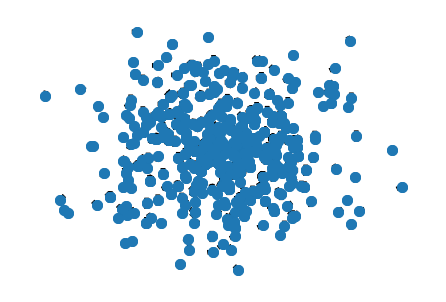

In [ ]:
nx.draw(g, with_labels=False, pos=nx.spectral_layout(g), node_size=100)

- 시각화는 별도의 소프트웨어 이용 추천 : [Gephi](https://gephi.org/)


In [ ]:
nx.write_graphml_lxml(g, "ko_covid_graph.graphml")